In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt


stock_path = "data/stock_data"

listings = pd.read_excel(
    os.path.join(stock_path, "listings.xlsx"),
)

print(len(listings))

listings.head()

360


/Users/arturopolancolozano/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
0,XXII,"22nd Century Group, Inc",1.3300,1.206285e+08,NaN,Consumer Non-Durables,Farming/Seeds/Milling
1,FAX,Aberdeen Asia-Pacific Income Fund Inc,5.0000,1.266333e+09,1986.0,NaN,NaN
2,IAF,Aberdeen Australia Equity Fund Inc,6.1500,1.398653e+08,NaN,NaN,NaN
3,CH,"Aberdeen Chile Fund, Inc.",7.2201,6.756346e+07,NaN,NaN,NaN
4,ABE,Aberdeen Emerging Markets Smaller Company Oppo...,13.3600,1.288430e+08,NaN,NaN,NaN


In [2]:
listings.Sector.value_counts()

Health Care              49
Basic Industries         44
Energy                   28
Consumer Services        27
Capital Goods            24
Technology               20
Consumer Non-Durables    13
Finance                  12
Public Utilities         11
Miscellaneous             5
Consumer Durables         4
Transportation            1
Name: Sector, dtype: int64

In [3]:
# Inspect listings
print(listings.info())

# Move 'stock symbol' into the index
listings.set_index('Stock Symbol', inplace=True)

# Drop rows with missing 'sector' data
listings.dropna(subset=["Sector"], inplace=True)

# Select companies with IPO Year before 2019
listings = listings[listings['IPO Year'] < 2019]

# Inspect the new listings data
print(listings.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           360 non-null    object 
 1   Company Name           360 non-null    object 
 2   Last Sale              346 non-null    float64
 3   Market Capitalization  360 non-null    float64
 4   IPO Year               105 non-null    float64
 5   Sector                 238 non-null    object 
 6   Industry               238 non-null    object 
dtypes: float64(3), object(4)
memory usage: 19.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, ACU to ZDGE
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           45 non-null     object 
 1   Last Sale              45 non-null     float64
 2   Market Capitalization  45 non-null     float64
 3   IPO 

In [4]:
# Show the number of companies per sector
print(listings.groupby("Sector").size().sort_values(ascending=False))


Sector
Health Care              11
Consumer Services         9
Basic Industries          8
Capital Goods             5
Technology                4
Public Utilities          3
Energy                    2
Consumer Non-Durables     1
Finance                   1
Miscellaneous             1
dtype: int64


In [5]:
# Select largest company for each sector
components = listings.groupby(['Sector'])['Market Capitalization'].nlargest(1)

# Print components, sorted by market cap
print(components.sort_values(ascending=False))

# Select stock symbols and print the result
tickers = components.index.get_level_values('Stock Symbol')
print(tickers)

# Print company name, market cap, and last price for each component 
info_cols = ['Company Name', 'Market Capitalization', 'Last Sale']
print(listings.loc[tickers, info_cols].sort_values('Market Capitalization', ascending=False))

Sector                 Stock Symbol
Public Utilities       CQP             1.104692e+10
Finance                SEB             4.603773e+09
Basic Industries       SIM             2.123559e+09
Consumer Services      GSAT            1.931551e+09
Health Care            CRHM            6.474389e+08
Energy                 MPO             4.794015e+08
Capital Goods          LBY             3.026988e+08
Consumer Non-Durables  ROX             2.376444e+08
Technology             MJCO            1.916146e+08
Miscellaneous          AUXO            5.913104e+07
Name: Market Capitalization, dtype: float64
Index(['SIM', 'LBY', 'ROX', 'GSAT', 'MPO', 'SEB', 'CRHM', 'AUXO', 'CQP',
       'MJCO'],
      dtype='object', name='Stock Symbol')
                                   Company Name  Market Capitalization  \
Stock Symbol                                                             
CQP                Cheniere Energy Partners, LP           1.104692e+10   
SEB                        Seaboard Corporatio

In [6]:
# Print tickers
print(tickers)

# Import prices and inspect result
stock_prices = pd.read_csv(
    os.path.join(stock_path, 'stock_data.csv'),
    parse_dates=["Date"],
    index_col="Date"
)
print(stock_prices.info())






Index(['SIM', 'LBY', 'ROX', 'GSAT', 'MPO', 'SEB', 'CRHM', 'AUXO', 'CQP',
       'MJCO'],
      dtype='object', name='Stock Symbol')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB
None


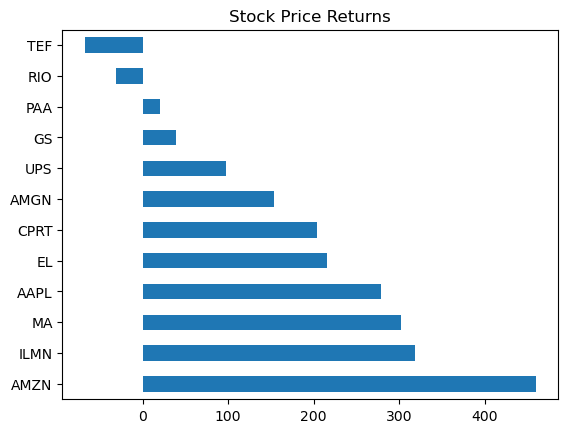

In [7]:
# Calculate the returns
price_return = stock_prices.iloc[-1].div(stock_prices.iloc[0]).sub(1).mul(100)

# Plot horizontal bar chart of sorted price_return  
price_return.sort_values(ascending=False).plot(title="Stock Price Returns", kind="barh") 
plt.show()

In [8]:
# Inspect listings and print tickers
print(listings.info())
print(tickers)

# Select components and relevant columns from listings
components = listings.loc[tickers][["Market Capitalization", "Last Sale"]]

# Print the first rows of components
print(components.head())

# Calculate the number of shares here
no_shares = components["Market Capitalization"].div(components["Last Sale"])
components["Number of Shares"] = no_shares




<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, ACU to ZDGE
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           45 non-null     object 
 1   Last Sale              45 non-null     float64
 2   Market Capitalization  45 non-null     float64
 3   IPO Year               45 non-null     float64
 4   Sector                 45 non-null     object 
 5   Industry               45 non-null     object 
dtypes: float64(3), object(3)
memory usage: 3.5+ KB
None
Index(['SIM', 'LBY', 'ROX', 'GSAT', 'MPO', 'SEB', 'CRHM', 'AUXO', 'CQP',
       'MJCO'],
      dtype='object', name='Stock Symbol')
              Market Capitalization  Last Sale
Stock Symbol                                  
SIM                    2.123559e+09      12.80
LBY                    3.026988e+08      13.82
ROX                    2.376444e+08       1.46
GSAT                   1.931551e+09       1.73
MPO         

In [9]:
# Print the sorted no_shares
print(no_shares.sort_values(ascending=False))

Stock Symbol
GSAT    1.116503e+09
CQP     3.378264e+08
SIM     1.659031e+08
ROX     1.627702e+08
CRHM    7.274594e+07
MJCO    3.649803e+07
MPO     2.499487e+07
LBY     2.190295e+07
AUXO    9.379477e+06
SEB     1.170550e+06
dtype: float64


In [13]:
# Select the number of shares
no_shares = components["Number of Shares"]
print(no_shares.sort_values())



Stock Symbol
SEB     1.170550e+06
AUXO    9.379477e+06
LBY     2.190295e+07
MPO     2.499487e+07
MJCO    3.649803e+07
CRHM    7.274594e+07
ROX     1.627702e+08
SIM     1.659031e+08
CQP     3.378264e+08
GSAT    1.116503e+09
Name: Number of Shares, dtype: float64


In [15]:
components

,Market Capitalization,Last Sale,Number of Shares
Stock Symbol,,,
SIM,2.123559e+09,12.8000,1.659031e+08
LBY,3.026988e+08,13.8200,2.190295e+07
ROX,2.376444e+08,1.4600,1.627702e+08
GSAT,1.931551e+09,1.7300,1.116503e+09
MPO,4.794015e+08,19.1800,2.499487e+07
SEB,4.603773e+09,3933.0000,1.170550e+06
CRHM,6.474389e+08,8.9000,7.274594e+07
AUXO,5.913104e+07,6.3043,9.379477e+06
CQP,1.104692e+10,32.7000,3.378264e+08


<Axes: ylabel='Stock Symbol'>

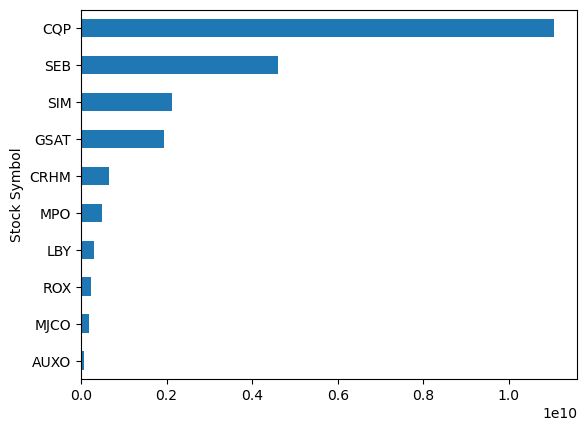

In [17]:
components["Market Capitalization"].sort_values().plot(kind="barh")

In [ ]:
# Calculate and print the index return here
index_return = ((index.iloc[-1] / index.iloc[0]) - 1) * 100
print(index_return)

# Select the market capitalization
market_cap = components['Market Capitalization']

# Calculate the total market cap
total_market_cap = market_cap.sum()

# Calculate the component weights, and print the result
weights = market_cap.div(total_market_cap)
print(weights.sort_values())

# Calculate and plot the contribution by component
weights.mul(index_return).sort_values().plot(kind="barh")
plt.show()



In [ ]:
# Convert index series to dataframe here
data = index.to_frame(name="Index")

# Normalize djia series and add as new column to data
djia = djia.div(djia.iloc[0]).mul(100)
data['DJIA'] = djia

# Show total return for both index and djia
print(data.iloc[-1].div(data.iloc[0]).sub(1).mul(100))

# Plot both series
data.plot()
plt.show()



In [ ]:
# Inspect data
print(data.info())
print(data.head())

# Create multi_period_return function here
def multi_period_return(r):
    return (np.prod(r + 1) - 1) * 100

# Calculate rolling_return_360
rolling_return_360 = data.pct_change().rolling('360D').apply(multi_period_return)

# Plot rolling_return_360 here
rolling_return_360.plot(title='Rolling 360D Return')
plt.show()


In [ ]:
# Inspect stock_prices here
print(stock_prices.info())

# Calculate the daily returns
returns = stock_prices.pct_change()

# Calculate and print the pairwise correlations
correlations = returns.corr()
print(correlations)

# Plot a heatmap of daily return correlations
sns.heatmap(correlations, annot=True)
plt.title('Daily Return Correlations')
plt.show()



In [ ]:
# Inspect index and stock_prices
print(index.info())
print(stock_prices.info())

# Join index to stock_prices, and inspect the result
data = stock_prices.join(index)
print(data.info())

# Create index & stock price returns
returns = data.pct_change()

# Export data and data as returns to excel
with pd.ExcelWriter('data.xls') as writer:
    data.to_excel(writer, sheet_name='data')
    returns.to_excel(writer, sheet_name='returns')
